In [1]:
# Data Analysis and Visualization
import numpy as np
import numba as nb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Aplicar el estilo de Seaborn correctamente
sns.set_theme()

from scipy import stats

# Import module for data visualization
# from plotnine import *
# import plotnine

import matplotlib.colors as mcolors

# --------------------------- sklearn for SML -------------------------------------

# Logistic Regression
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import LogisticRegressionCV  # Logistic Regression with Cross Validation

# PCA
from sklearn.decomposition import PCA 

# t-SNE
from sklearn.manifold import TSNE

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# KNN
from sklearn.neighbors import KNeighborsClassifier  

# SVM
from sklearn.svm import SVC

# Bagging
from sklearn.ensemble import BaggingClassifier

# Encoding variables
from sklearn.preprocessing import LabelEncoder 

# Standard Scaler 
from sklearn.preprocessing import StandardScaler       

# Data split
from sklearn.model_selection import train_test_split 

# Resample unbalanced data
from sklearn.utils import resample

# Metrics
from sklearn import metrics
# Validation scoring
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# ROC
from sklearn.metrics import roc_curve

# Precision-Recall curve
from sklearn.metrics import precision_recall_curve

# Import sklearn metrics for validation
import sklearn.metrics as skm

# Cross validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 

# Import cdist for SSE (Distortion)
from scipy.spatial.distance import cdist

# Decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor      
from sklearn import tree    

# Random forest
from sklearn.ensemble import RandomForestClassifier

# KMeans Clustering
from sklearn.cluster import KMeans  

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# --------------------------- Self-Organizing Map ---------------------------------

from sklearn_som.som import SOM

# ---------------------------- PyTorch for DL ---------------------------------

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as trans
import torch.nn.functional as F

from torch.utils.data import DataLoader

# ----------------------------- Keras for DL ----------------------------------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# !pip install torchmetrics
# from torchmetrics import ConfusionMatrix  # Confusion matrix for validation

from numpy import loadtxt
import tensorflow as tf
from tensorflow import keras

# ----------------------------- Grid Search ------------------------------------

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier


from collections import Counter

# Math
import math

# ------------------------- XGBoost ------------------------------------
from xgboost import XGBClassifier

# -------------------------- TorchViz ---------------------------------------
from torchviz import make_dot


## (I) Data spliting and scaling

- **Spliting** dataframe for training, testing and validation
- **Scaling** the predictor to normalize the impact factor, since each predictor has a different degree of impact on the outcome
    - Here, we use `StandardScaler()` to achieve this, we can also use `heatmap` alternatively.

In [2]:
def data_split(data):
    
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    
    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2, random_state=0)
    return train_x, test_x, train_y, test_y

def data_scaling(train_x, test_x):
    # Method StandardScaler()
    ss = StandardScaler()
    ss_model = ss.fit(train_x)
    train_x_scaled = ss_model.transform(train_x)
    test_x_scaled = ss_model.transform(test_x)
    return train_x_scaled, test_x_scaled


def data_scaling_plot(data):
    X = data.iloc[:,:-1].to_numpy()
    y = data.iloc[:,-1].to_numpy()
    # Method StandardScaler()
    ss = StandardScaler()
    ss_model = ss.fit(X)
    X_scaled = ss_model.transform(X)
    np_new = np.hstack((X_scaled, y.reshape(len(y),1)))
    column_headers = data.columns.values.tolist()
    df_new = pd.DataFrame(data = np_new, columns = column_headers)
    return df_new

In [3]:
## (II) Data balancing
### Check the number of each class

In [4]:
def check_num(df):
  print("Class 0:", (df.iloc[:,-1] == 0).sum())
  print("Class 1:", (df.iloc[:,-1] == 1).sum())

### Oversample

Oversample will not be used since it will introduced bias

In [5]:
def oversample(df):
  #create two different dataframe of majority and minority class 
  if ((df.iloc[:,-1] == 0).sum()) >= ((df.iloc[:,-1] == 1).sum()):
    df_majority = df[(df.iloc[:,-1] == 0)] 
    df_minority = df[(df.iloc[:,-1] == 1)]
    n_major = (df.iloc[:,-1] == 0).sum()
  else:
    df_majority = df[(df.iloc[:,-1] == 1)] 
    df_minority = df[(df.iloc[:,-1] == 0)]
    n_major = (df.iloc[:,-1] == 1).sum()    
  
  # oversample minority class
  df_minority_oversample = resample(df_minority, 
                                  replace=True,    # sample with replacement
                                  n_samples= n_major, # to match majority class
                                  random_state=42)  # reproducible results
  # Combine
  resample_df = pd.concat([df_minority_oversample, df_majority])

  # Shuffle
  resample_df = resample_df.sample(frac=1, random_state=0).reset_index(drop=True)

  return resample_df

### Undersample

In [6]:
def undersample(df):
  #create two different dataframe of majority and minority class 
  if ((df.iloc[:,-1] == 0).sum()) >= ((df.iloc[:,-1] == 1).sum()):
    df_majority = df[(df.iloc[:,-1] == 0)] 
    df_minority = df[(df.iloc[:,-1] == 1)]
    n_minor = (df.iloc[:,-1] == 1).sum()
  else:
    df_majority = df[(df.iloc[:,-1] == 1)] 
    df_minority = df[(df.iloc[:,-1] == 0)]
    n_minor = (df.iloc[:,-1] == 0).sum()   
  
  # oversample minority class
  df_majority_undersample = resample(df_majority, 
                                  replace=True,    # sample with replacement
                                  n_samples= n_minor, # to match minority class
                                  random_state=42)  # reproducible results
  # Combine
  resample_df = pd.concat([df_majority_undersample, df_minority])

  # Shuffle
  resample_df = resample_df.sample(frac=1, random_state=1).reset_index(drop=True)

  return resample_df

## (III) Data visualization
### 2D: PCA & t-SNE

In [7]:
def dim2(df, size, markersize):
  '''
  Parameters:
  size is the size of marker in the plot, default is 1.5,
  markersize is the size of marker in the legend, default is 10.

  '''


  x = df.iloc[:,:-1].to_numpy()
  y = df.iloc[:,-1].to_numpy()

  ss = StandardScaler()
  ss_model = ss.fit(x)
  x_scaled = ss_model.transform(x)

# ============ PCA ===============
  pca = PCA(n_components=2)

  x_pca = pca.fit_transform(x_scaled)

  np_pca = np.hstack((x_pca, y.reshape(len(y),1)))

  column_pca = ['pc_0', 'pc_1', 'class']

  df_pca = pd.DataFrame(data = np_pca, columns = column_pca)


  df_0_pca = df_pca[(df_pca.iloc[:,-1] == 0)]
  df_1_pca = df_pca[(df_pca.iloc[:,-1] == 1)]
  x_0_pca = df_0_pca.iloc[:,:-1].to_numpy()
  x_1_pca = df_1_pca.iloc[:,:-1].to_numpy()

# ============ t-SNE ===============

  tsne = TSNE(n_components=2)
  
  x_tsne = tsne.fit_transform(x_scaled)

  np_tsne = np.hstack((x_tsne, y.reshape(len(y),1)))

  column_tsne = ['dim_0', 'dim_1', 'class']

  df_tsne = pd.DataFrame(data = np_tsne, columns = column_tsne)


  df_0_tsne = df_tsne[(df_tsne.iloc[:,-1] == 0)]
  df_1_tsne = df_tsne[(df_tsne.iloc[:,-1] == 1)]
  x_0_tsne = df_0_tsne.iloc[:,:-1].to_numpy()
  x_1_tsne = df_1_tsne.iloc[:,:-1].to_numpy()


# ============ plot ===============

  fig = plt.figure(figsize = (16, 5))

  ax = plt.subplot(121)

  class_0_pca = ax.scatter(x_0_pca[:,0], x_0_pca[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_pca = ax.scatter(x_1_pca[:,0], x_1_pca[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax.legend(handles=[class_0_pca, class_1_pca] , markerscale=markersize, loc = 'best', 
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('PCA', size = 12)
 
  ax2 = plt.subplot(122)

  class_0_tsne = ax2.scatter(x_0_tsne[:,0], x_0_tsne[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_tsne = ax2.scatter(x_1_tsne[:,0], x_1_tsne[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax2.legend(handles=[class_0_tsne, class_1_tsne] , markerscale=markersize, loc = 'best', 
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('t-SNE', size = 12)


  plt.show()

### 2D: PCA only:

This served as a helper function for visualize the outcome of each classifier.

In [8]:
def pca_plot(test_x_scaled, test_y, test_y_pred, size, markersize):

  pca = PCA(n_components=2)

  x_pca = pca.fit_transform(test_x_scaled)

  true_np = np.hstack((x_pca, test_y.reshape(len(test_y),1)))

  pred_np = np.hstack((x_pca, test_y_pred.reshape(len(test_y_pred),1)))

  column_true = ['pc_0', 'pc_1', 'true']

  column_pred = ['pc_0', 'pc_1', 'pred']

  true_df = pd.DataFrame(data = true_np, columns = column_true)

  pred_df = pd.DataFrame(data = pred_np, columns = column_pred)

  true_df_0 = true_df[(true_df.iloc[:,-1] == 0)]
  true_df_1 = true_df[(true_df.iloc[:,-1] == 1)]
  true_x_0 = true_df_0.iloc[:,:-1].to_numpy()
  true_x_1 = true_df_1.iloc[:,:-1].to_numpy()

  pred_df_0 = pred_df[(pred_df.iloc[:,-1] == 0)]
  pred_df_1 = pred_df[(pred_df.iloc[:,-1] == 1)]
  pred_x_0 = pred_df_0.iloc[:,:-1].to_numpy()
  pred_x_1 = pred_df_1.iloc[:,:-1].to_numpy()

  join_df = true_df.join(pred_df["pred"])

  correct_df = join_df[(join_df.true == join_df.pred)]

  wrong_df = join_df[(join_df.true != join_df.pred)]

  correct_df_0 = correct_df[(correct_df.iloc[:,-2] == 0)]
  correct_df_1 = correct_df[(correct_df.iloc[:,-2] == 1)]
  correct_x_0 = correct_df_0.iloc[:,:-2].to_numpy()
  correct_x_1 = correct_df_1.iloc[:,:-2].to_numpy()

  fn_df = wrong_df[(wrong_df.iloc[:,-1] == 0)]
  fp_df = wrong_df[(wrong_df.iloc[:,-1] == 1)]
  fn_x = fn_df.iloc[:,:-2].to_numpy()
  fp_x = fp_df.iloc[:,:-2].to_numpy()



# ============ plot ==================


  fig = plt.figure(figsize = (24, 5))

  ax1 = plt.subplot(131)


  true_class_0 = ax1.scatter(true_x_0[:,0], true_x_0[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  true_class_1 = ax1.scatter(true_x_1[:,0], true_x_1[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax1.legend(handles=[true_class_0, true_class_1] , markerscale=markersize, loc = 'best', 
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('Ground Truth of Test Data', size = 12)

  ax2 = plt.subplot(132)


  pred_class_0 = ax2.scatter(pred_x_0[:,0], pred_x_0[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  pred_class_1 = ax2.scatter(pred_x_1[:,0], pred_x_1[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax2.legend(handles=[pred_class_0, pred_class_1] , markerscale=markersize, loc = 'best', 
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('Prediction', size = 12)


  ax3 = plt.subplot(133)

  correct_class_0 = ax3.scatter(correct_x_0[:,0], correct_x_0[:,1], c='blue', s=size, alpha=0.3, label='True Negative')
  correct_class_1 = ax3.scatter(correct_x_1[:,0], correct_x_1[:,1], c='orange', s=size, alpha=0.3, label='True Positive')
  fn_class = ax3.scatter(fn_x[:,0], fn_x[:,1], c='green', s=size, alpha=0.3, label='False Negative')
  fp_class = ax3.scatter(fp_x[:,0], fp_x[:,1], c='red', s=size, alpha=0.3, label='False Positive')
  ax3.legend(handles=[correct_class_0, correct_class_1, fn_class, fp_class] , markerscale=markersize, loc = 'best', 
            frameon = True, facecolor = 'white', edgecolor = 'black')

  plt.title('Comparison', size = 12)

  plt.show()

### 3D: PCA

In [9]:
def dim3(df, size, markersize):
  x = df.iloc[:,:-1].to_numpy()
  y = df.iloc[:,-1].to_numpy()

  ss = StandardScaler()
  ss_model = ss.fit(x)
  x_scaled = ss_model.transform(x)

  pca_1 = PCA(n_components = 3).fit(x_scaled)

  Xt = pca_1.transform(x_scaled)

  new_np = np.hstack((Xt, y.reshape(len(y),1)))

  column_values = ['pc_0', 'pc_1', 'pc_2', 'class']

  new_df = pd.DataFrame(data = new_np, columns = column_values)


  df_0 = new_df[(new_df.iloc[:,-1] == 0)]
  df_1 = new_df[(new_df.iloc[:,-1] == 1)]
  x_0 = df_0.iloc[:,:-1].to_numpy()
  y_0 = df_0.iloc[:,-1].to_numpy()
  x_1 = df_1.iloc[:,:-1].to_numpy()
  y_1 = df_1.iloc[:,-1].to_numpy()

  
  fig = plt.figure(figsize = (16, 5))
  
  ax = plt.subplot(121, projection ="3d")
  class_0 = ax.scatter3D(x_0[:,0], x_0[:,1], x_0[:,2], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1 = ax.scatter3D(x_1[:,0], x_1[:,1], x_1[:,2], c='orange', s=size, alpha=0.3, label='Positive Cases')
  ax.legend(handles=[class_0, class_1] , markerscale=markersize, loc = 'best', 
            frameon = True, facecolor = 'white', edgecolor = 'black')
  

  ax_2 = plt.subplot(122, projection ="3d")
  class_0_2 = ax_2.scatter3D(x_0[:,1], x_0[:,0], x_0[:,2], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_2 = ax_2.scatter3D(x_1[:,1], x_1[:,0], x_1[:,2], c='orange', s=size, alpha=0.3, label='Positive Cases')
  ax_2.legend(handles=[class_0, class_1] , markerscale=markersize, loc = 'best', 
            frameon = True, facecolor = 'white', edgecolor = 'black')

  plt.show()

# V. Datasets

First we need to study the correlation between the predictors and outcomes. In order to find the appropriate dataset as the research object, the screening of multiple is indispensable.  





| Name    | Description    |
| :------------- | :------------- |
|NIDDK_Pima|It's a dataset of 768 females at least 21 years old of Pima Indian heritage responses to National Institute of Diabetes and Digestive and Kidney Diseases's survey.|
|CDC_BRFSS2015|It's a dataset of 253,680 survey responses to the CDC's BRFSS2015.|
|Sylhet|This dataset has been collected using direct questionnaires from 520 patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh.|
|BIT_2019|This dataset was collected in 2019 by Neha Prerna Tigga and Dr. Shruti Garg of the Department of Computer Science and Engineering, BIT Mesra|




-----





-----
# 1 . NIDDK Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

####  Attribute Information
| Column Name    | Expression    |
| :------------- | :------------- |
| Pregnancies | Number of times pregnant |
| Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness | Triceps skin fold thickness (mm) |
| Insulin | 2-Hour serum insulin (mu U/ml) |
| BMI | Body mass index (weight in kg/(height in m)^2) |
| DiabetesPedigreeFunction | Diabetes pedigree function |
| Age | Age (years) |
| Outcome | Class variable (0 or 1) |





## 1.0 Data Pre-Processing
### 1.0.1 Loading data

In [10]:
# Read 'NIDDK_Pima.csv'
niddk_df = pd.read_csv("./data/NIDDK_Pima.csv")

# Drop NaN value
print("Any null value:", any(niddk_df.isnull()))
print("Any NaN value:", any(niddk_df.isna()))
print("Before Droping NaN Number of Rows:", len(niddk_df))

niddk_df = niddk_df.dropna()
print("After Droping NaN Number of Rows:", len(niddk_df))

niddk_df.tail()

Any null value: True
Any NaN value: True
Before Droping NaN Number of Rows: 768
After Droping NaN Number of Rows: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


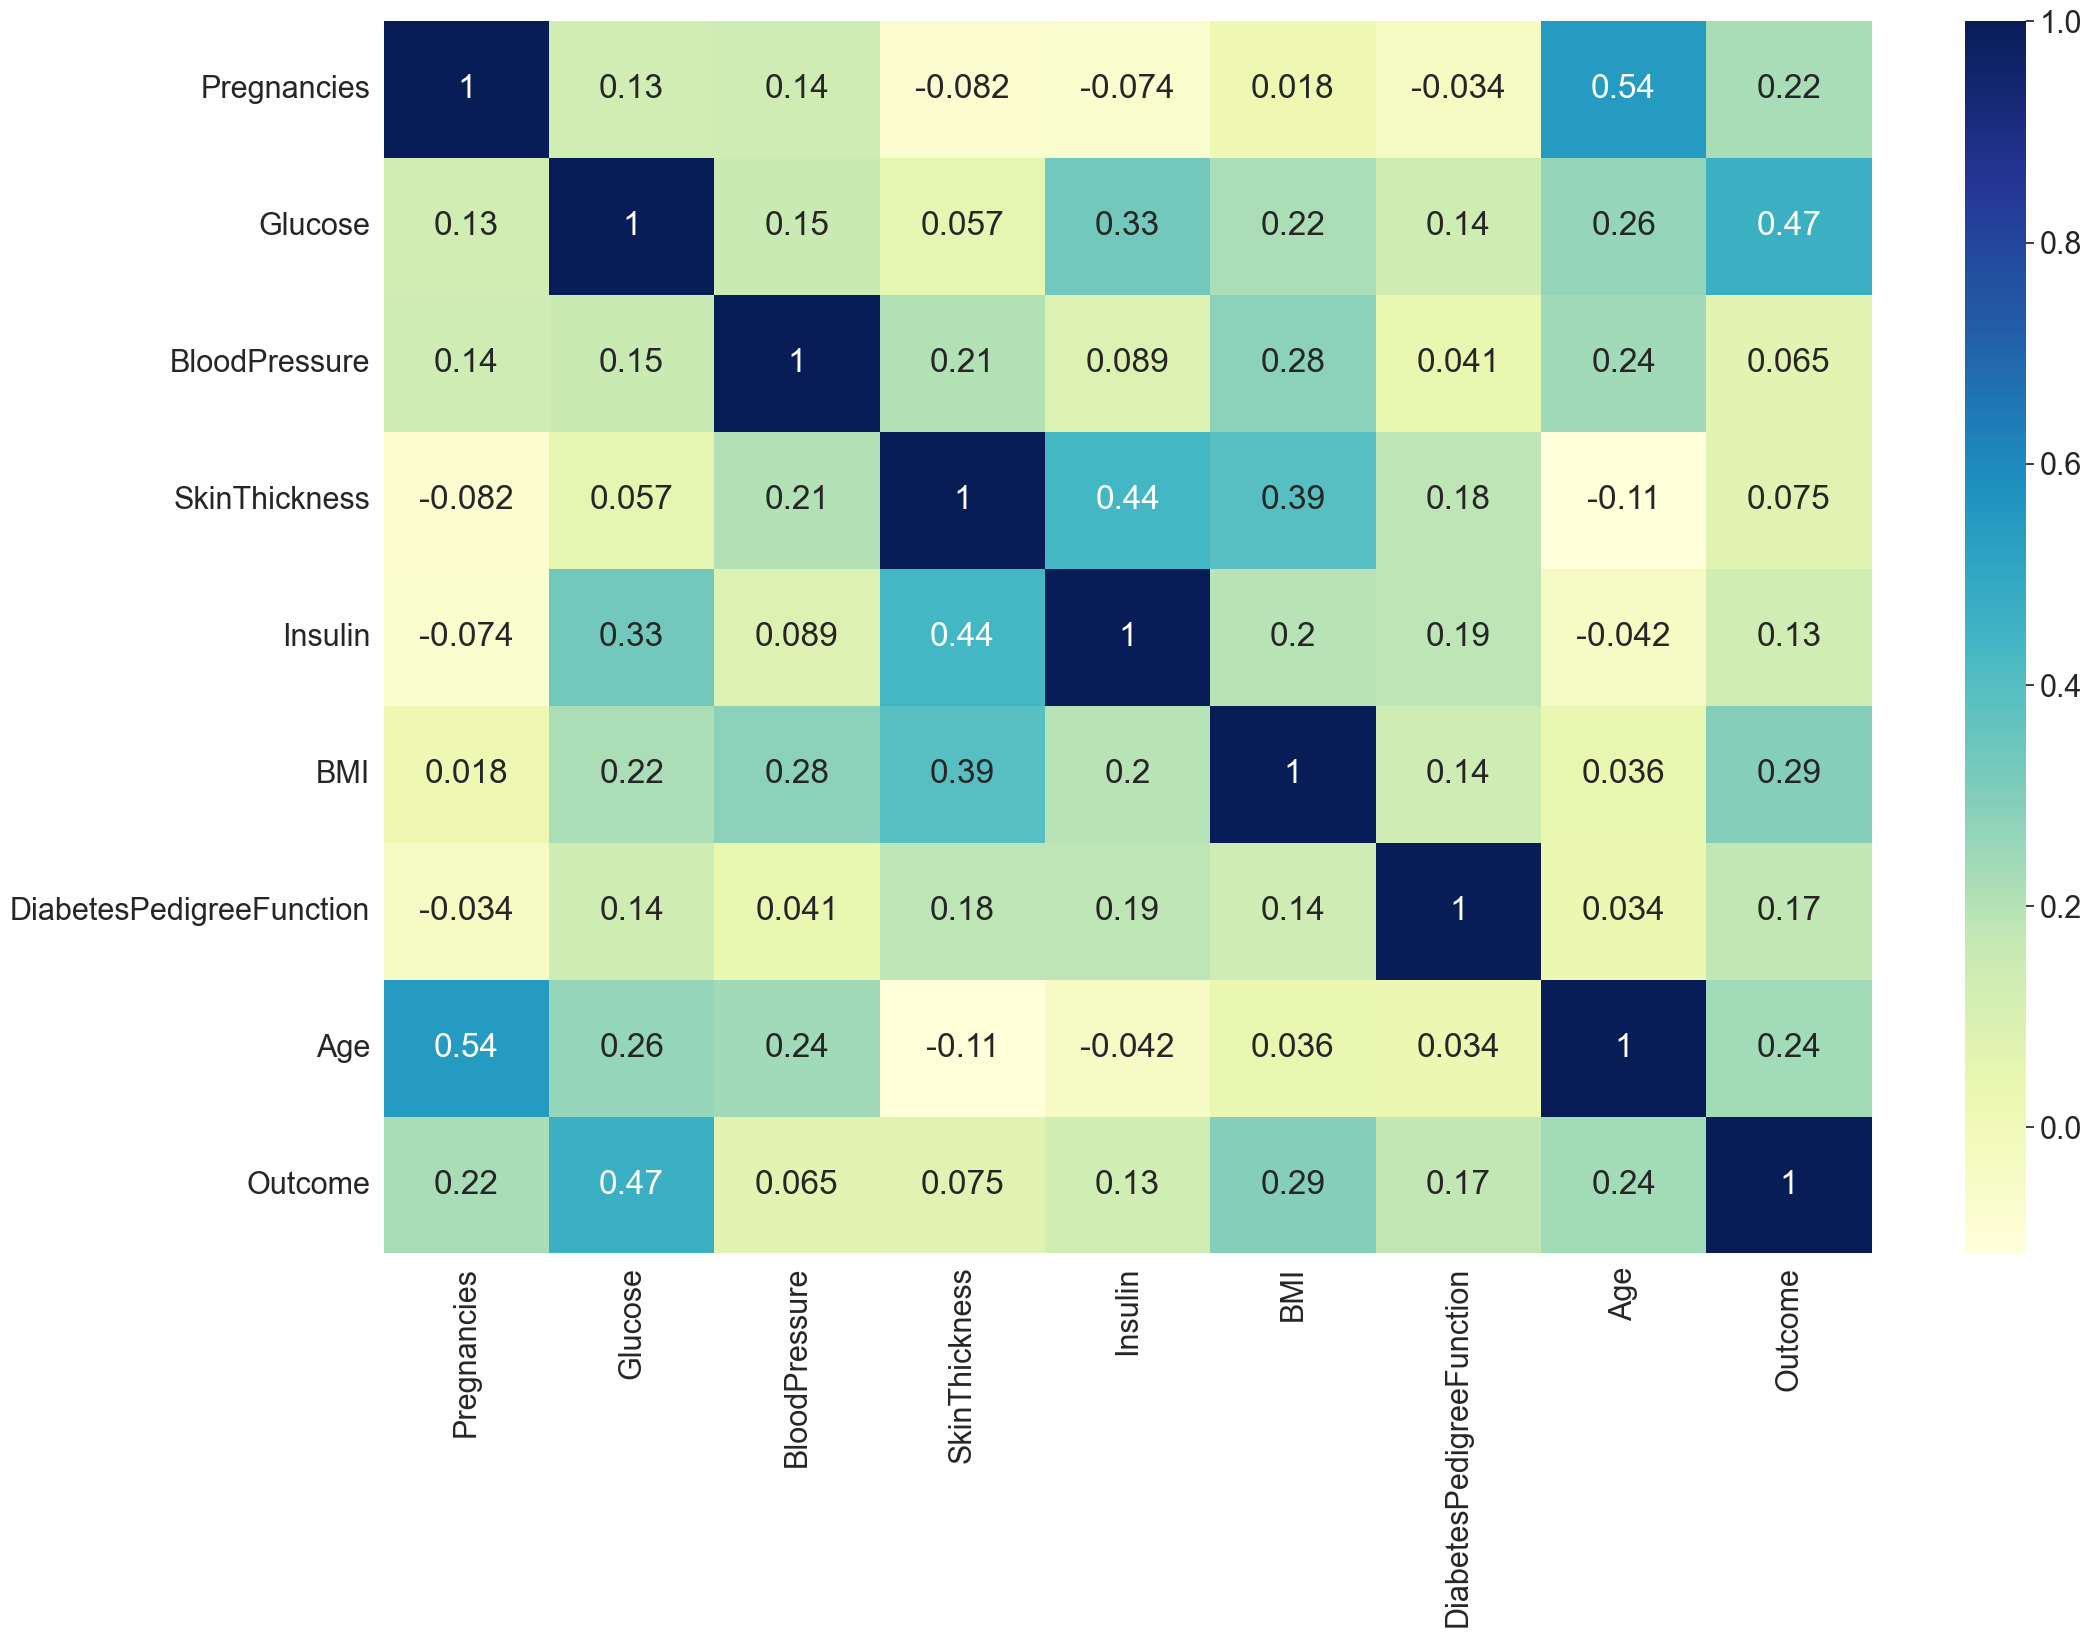

In [11]:
corrMatrix = niddk_df.corr()

# Generate a heatmap
plt.figure(figsize=[24,16])
with sns.plotting_context("notebook",font_scale=2):
  sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)

---
### 1.0.2 Data Balance

In [12]:
check_num(niddk_df)

Class 0: 500
Class 1: 268


In [13]:
niddk_df = undersample(niddk_df)
check_num(niddk_df)

Class 0: 268
Class 1: 268


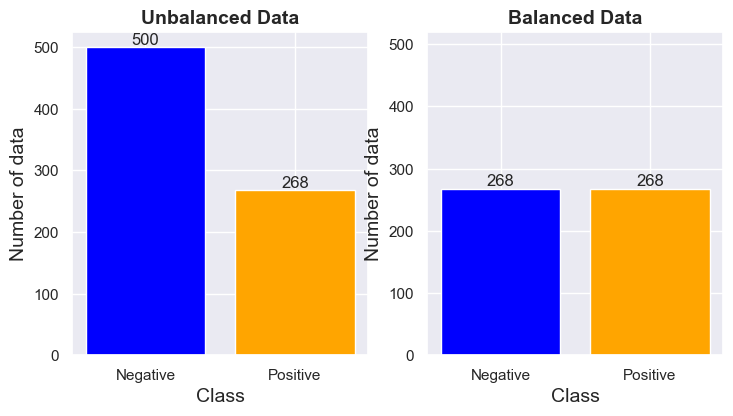

In [14]:
plt.figure(figsize = (8.4, 4.2))

plt.subplot(1, 2, 1)
x = ["Negative", "Positive"]
h = [500,268]
c = ['blue', 'orange']
bars = plt.bar(x, height = h, color = c)
plt.bar_label(bars)
plt.xlabel("Class", size=14)
plt.ylabel("Number of data", size=14)
plt.title("Unbalanced Data", size=14, fontweight='bold')


plt.subplot(1, 2, 2)
x = ["Negative", "Positive"]
h = [268,268]
c = ['blue', 'orange']
bars = plt.bar(x, height = h, color = c)
plt.bar_label(bars)
plt.ylim(0, 520)
plt.xlabel("Class", size=14)
plt.ylabel("Number of data", size=14)
plt.title("Balanced Data", size=14, fontweight='bold')


plt.show()

### 1.0.3 Data Scaling

Before Scaling:

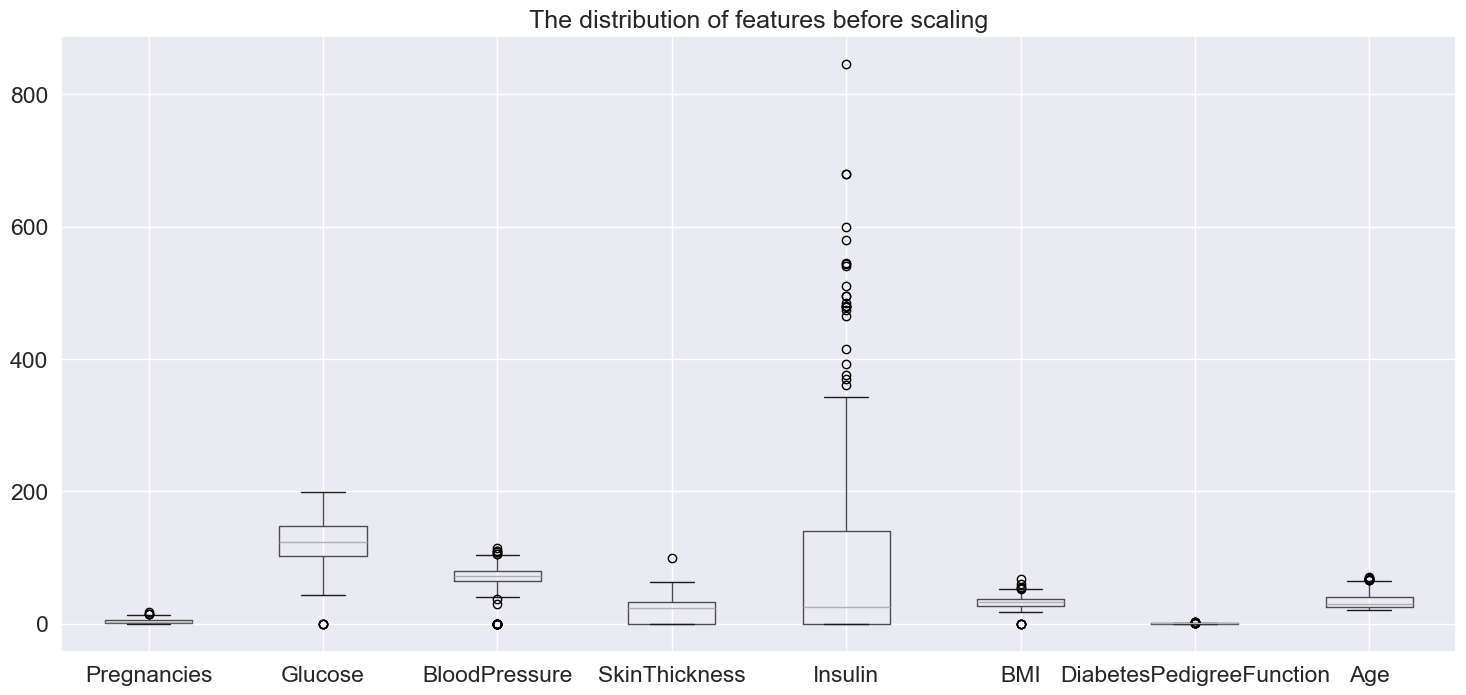

In [15]:
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  niddk_df.boxplot(column=niddk_df.columns.values.tolist()[:-1])
  plt.title("The distribution of features before scaling")

After scaling

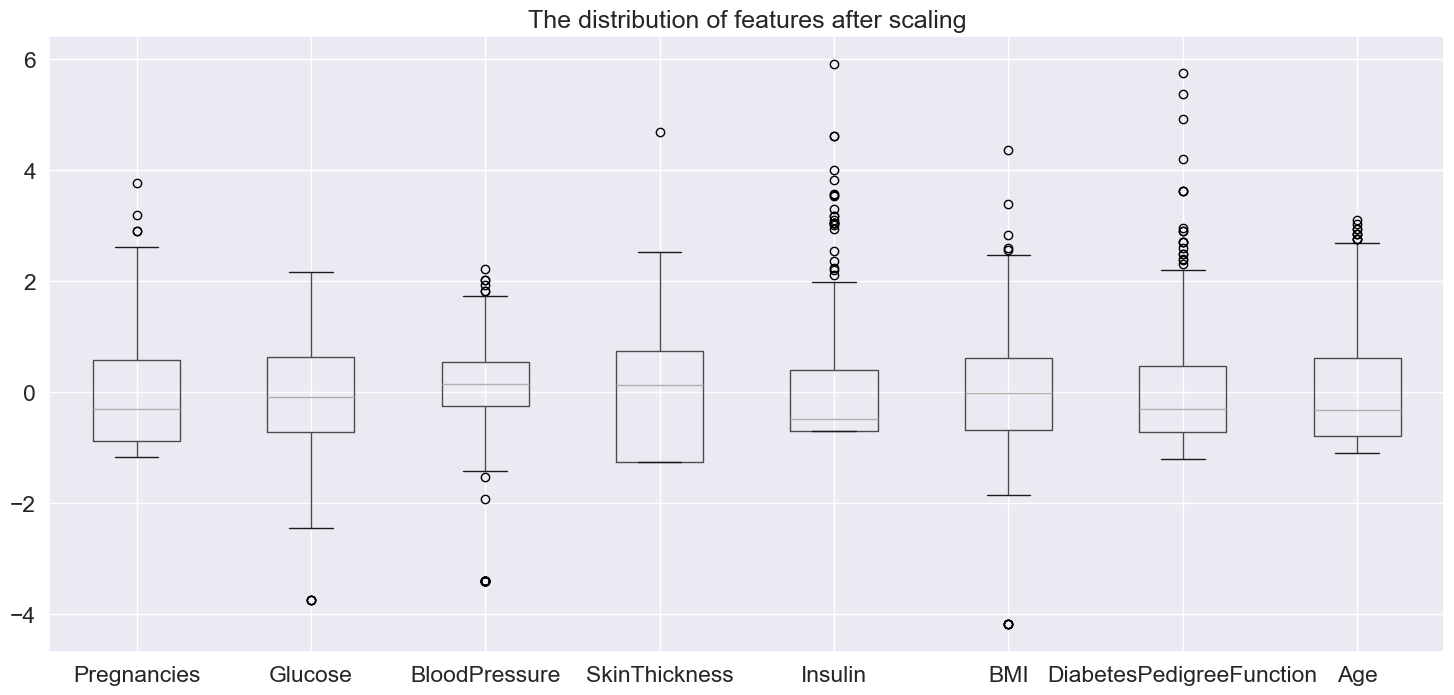

In [16]:
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  data_scaling_plot(niddk_df).boxplot(column=niddk_df.columns.values.tolist()[:-1])
  plt.title("The distribution of features after scaling")

### 1.0.4 Data Visualization


#### 1.0.4.1 Visualization in 2D

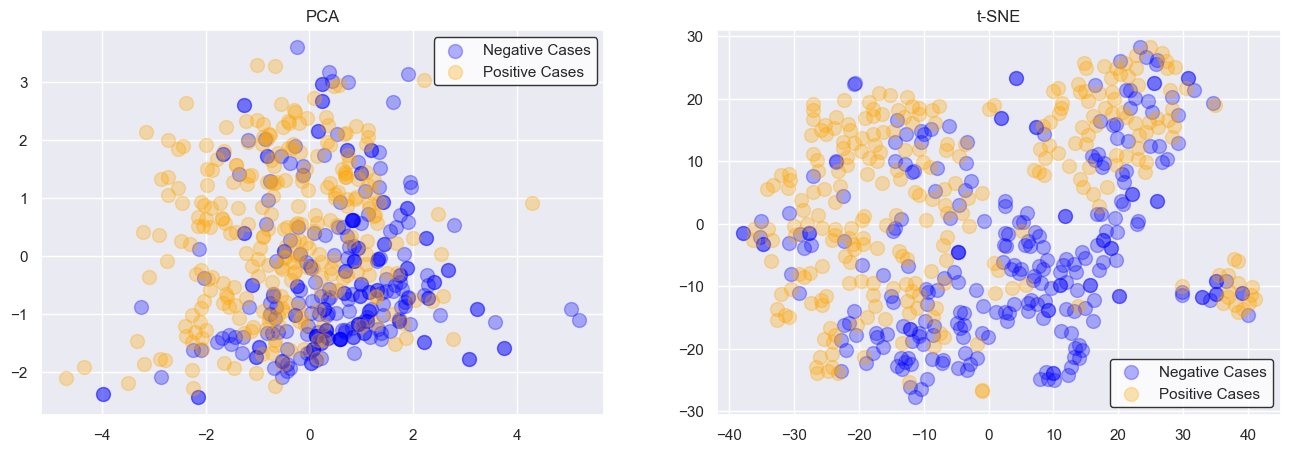

In [17]:
dim2(niddk_df, 100, 1)

## 1.12 BPNN
### 1.12.1 Parameter Tuning via Grid Search

In [18]:
!nvidia-smi

Sat Mar 15 19:07:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   52C    P8             18W /  170W |    1311MiB /  12288MiB |     28%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

# ---------- Preparación de datos ----------
train_x, test_x, train_y, test_y = data_split(niddk_df)  # Dividir en train y test
train_x_scaled, test_x_scaled = data_scaling(train_x, test_x)  # Escalar los datos

# Convertir a tipo float32 para mejorar rendimiento
train_x_scaled = np.float32(train_x_scaled)
test_x_scaled = np.float32(test_x_scaled)


# ---------- Convertir datos a tensores ----------
# Convertir datos a tensores
train_x_tensor = torch.tensor(train_x_scaled, dtype=torch.float32)
test_x_tensor = torch.tensor(test_x_scaled, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y.to_numpy(), dtype=torch.long)
test_y_tensor = torch.tensor(test_y.to_numpy(), dtype=torch.long)  


# Crear dataset para batch training
train_dataset = TensorDataset(train_x_tensor, train_y_tensor)
test_dataset = TensorDataset(test_x_tensor, test_y_tensor)

# Función para seleccionar la activación
def get_activation(name):
    activations = {
        "relu": nn.ReLU(),
        "sigmoid": nn.Sigmoid(),
        "softmax": nn.Softmax(dim=1)
    }
    return activations[name]

# Definir la Red Neuronal flexible
class BPNN(nn.Module):
    def __init__(self, input_size, layers, activation):
        super(BPNN, self).__init__()
        self.layers = nn.ModuleList()
        
        prev_size = input_size
        for layer_size in layers:
            self.layers.append(nn.Linear(prev_size, layer_size))
            self.layers.append(get_activation(activation))
            prev_size = layer_size

        self.layers.append(nn.Linear(prev_size, len(torch.unique(train_y_tensor))))  # Capa de salida

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x  # Sin softmax, ya que CrossEntropyLoss lo incluye

class TorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, layers=[16, 8, 4], activation="relu", optimizer="Adam", batch_size=32, epochs=1000):
        self.layers = layers
        self.activation = activation
        self.optimizer = optimizer  # 🔹 Aquí se inicializa correctamente
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None  # 🔹 Asegurar inicialización del modelo

    def fit(self, X, y):
        # Convertir datos a tensores
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y.to_numpy(), dtype=torch.long)  # 🔹 Conversión correcta
        dataset = TensorDataset(X_tensor, y_tensor)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        # Instanciar modelo con las capas y activación elegidas
        self.model = BPNN(input_size=X.shape[1], layers=self.layers, activation=self.activation)
        criterion = nn.CrossEntropyLoss()

        # Seleccionar optimizador correctamente
        if self.optimizer == "Adam":
            optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        elif self.optimizer == "SGD":
            optimizer = optim.SGD(self.model.parameters(), lr=0.001)
        else:
            raise ValueError(f"Optimizador '{self.optimizer}' no reconocido")

        # Entrenar la red
        for epoch in range(self.epochs):
            for batch_X, batch_y in dataloader:
                optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()

        return self


    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        with torch.no_grad():
            outputs = self.model(X_tensor)
        return outputs.argmax(dim=1).numpy()

# Definir el Grid de Hiperparámetros
param_grid = {
    "layers": [[16, 8, 4], [32, 16, 8], [64, 32, 16]],  # Variantes de arquitecturas
    "activation": ["sigmoid", "relu", "softmax"],  # Funciones de activación
    "optimizer": ["SGD", "Adam"],  # Optimizadores
    "batch_size": [8, 16, 32],  # Tamaños de batch
    "epochs": [1000]  # Fijo en 1000 épocas
}

# Ejecutar Grid Search
grid_search = GridSearchCV(TorchClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_x_scaled, train_y)

# Obtener mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor accuracy en validación:", grid_search.best_score_)

# Evaluar en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_x_scaled)
accuracy = accuracy_score(test_y, y_pred)

print("Accuracy en conjunto de prueba:", accuracy)


KeyboardInterrupt: 

Epochs [100/10000]
Training: Losses: 0.4536305070, Accuracy: 0.875
Testing: Losses: 0.4989041090, Accuracy: 0.8240740740740741
Testing: Sensitivity/Recall: 0.8518518518518519 Specificity: 0.7962962962962963
Epochs [200/10000]
Training: Losses: 0.4727278948, Accuracy: 0.84375
Testing: Losses: 0.5233004689, Accuracy: 0.7777777777777778
Testing: Sensitivity/Recall: 0.7777777777777778 Specificity: 0.7777777777777778
Epochs [300/10000]
Training: Losses: 0.4030681551, Accuracy: 0.875
Testing: Losses: 0.4998885393, Accuracy: 0.8148148148148148
Testing: Sensitivity/Recall: 0.8333333333333334 Specificity: 0.7962962962962963
Epochs [400/10000]
Training: Losses: 0.4129339159, Accuracy: 0.90625
Testing: Losses: 0.4904221892, Accuracy: 0.8240740740740741
Testing: Sensitivity/Recall: 0.7962962962962963 Specificity: 0.8518518518518519
Epochs [500/10000]
Training: Losses: 0.4115358591, Accuracy: 0.90625
Testing: Losses: 0.5129157901, Accuracy: 0.7962962962962963
Testing: Sensitivity/Recall: 0.77777777

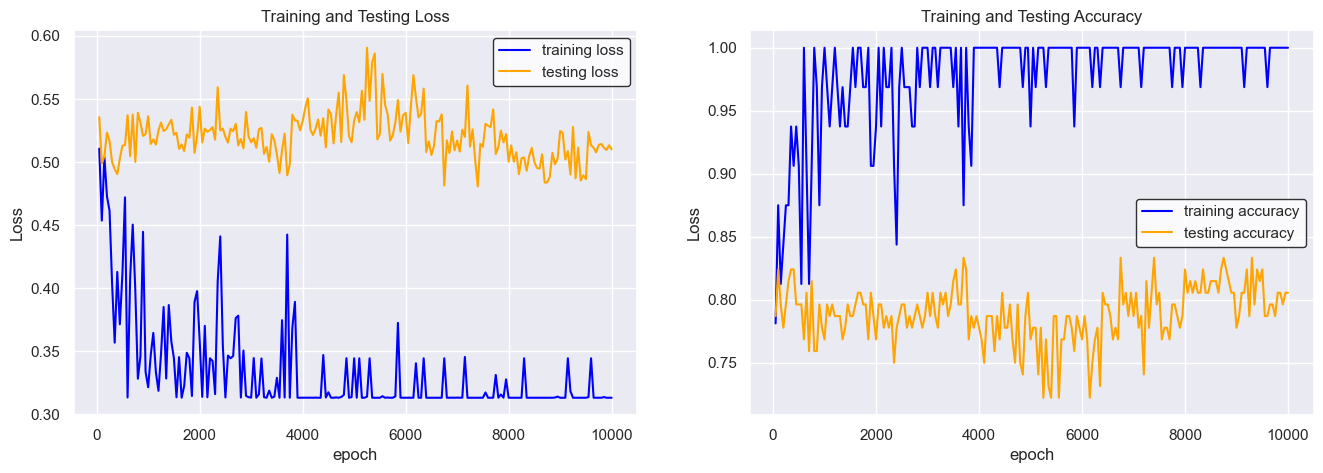

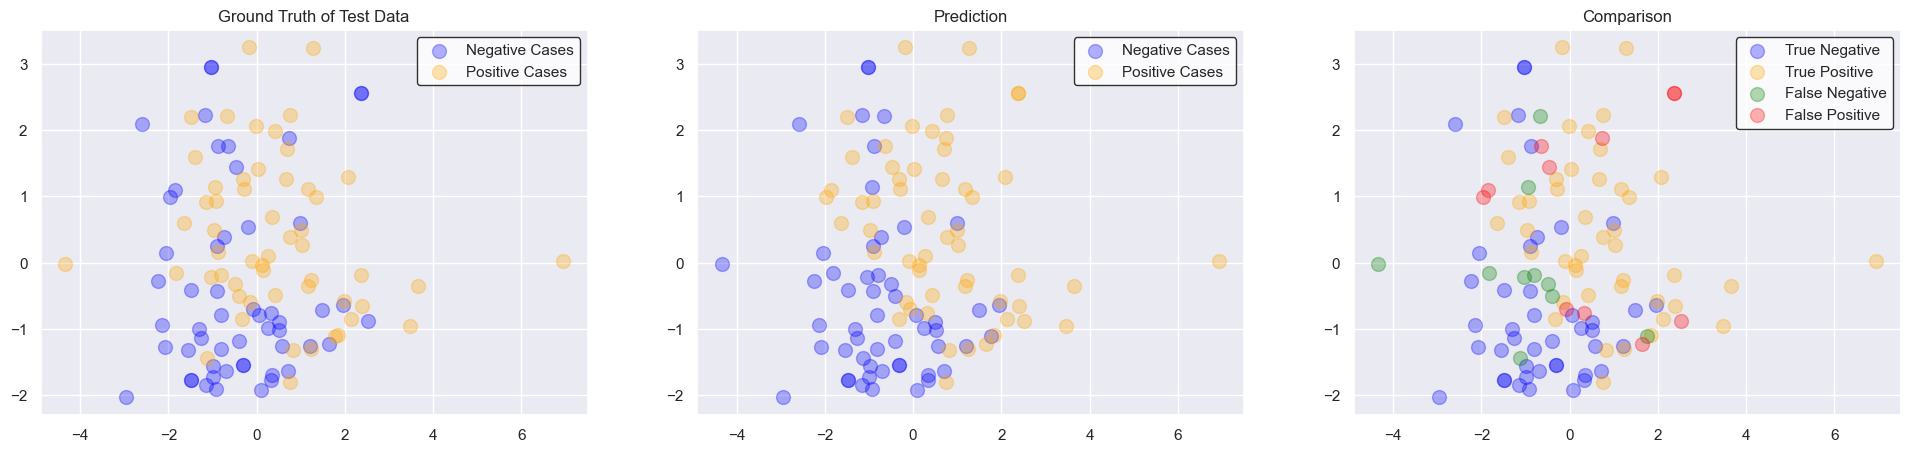

In [ ]:
# Prepare training and testing data
train_x, test_x, train_y, test_y = data_split(niddk_df)


train_x_scaled, test_x_scaled = data_scaling(train_x, test_x)


train_x = torch.from_numpy(train_x_scaled).float()
train_y = torch.squeeze(torch.from_numpy(train_y.to_numpy()).float())

test_x = torch.from_numpy(test_x_scaled).float()
test_y = torch.squeeze(torch.from_numpy(test_y.to_numpy()).float())

# print(train_x.shape, train_y.shape)
# print(test_x.shape, test_y.shape)


# Building BPNN
class bpnn(nn.Module):
  # Initialize the neural network with three fully connected hidden layers
  def __init__(self, input, hid1, hid2, hid3, numclases):
    super(bpnn, self).__init__()
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(input, hid1)
    self.batch_norm1 = nn.BatchNorm1d(num_features=hid1)
    self.fc2 = nn.Linear(hid1, hid2)
    self.batch_norm2 = nn.BatchNorm1d(num_features=hid2)
    self.fc3 = nn.Linear(hid2, hid3)
    self.batch_norm3 = nn.BatchNorm1d(num_features=hid3)
    self.fc4 = nn.Linear(hid3, numclass)
  # feedforward
  def forward(self, x):
    x = F.sigmoid(self.fc1(x)) # Activation using sigmoid function for regularization
    x = self.batch_norm1(x)
    x = F.sigmoid(self.fc2(x))
    x = self.batch_norm2(x)
    x = F.sigmoid(self.fc3(x))
    x = self.batch_norm3(x)
    x = F.sigmoid(self.fc4(x))
    return x

input = train_x.shape[1] 
hid1 = 64
hid2 = 32
hid3 = 32
numclass = 2
epochs = 10000
batch = 32
lrate =0.001

modl = bpnn(input, hid1, hid2 ,hid3, numclass)

criterion = nn.CrossEntropyLoss()
# criterion = nn.BCELoss()
optim = torch.optim.Adam(modl.parameters(), lr=lrate)

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
epoch_list = []

for epoch in range(epochs):
  shuffle_indices = np.random.permutation(np.arange(train_y.shape[0]))
  source = train_x[shuffle_indices]
  target = train_y[shuffle_indices]

  for batch_i in range(0, len(source)//batch):
    start_i = batch_i * batch
    source_batch = source[start_i:start_i + batch]
    target_batch = target[start_i:start_i + batch]
    train_pred = modl(source_batch)
    train_pred = torch.squeeze(train_pred)
    losses = criterion(train_pred, target_batch.type(torch.LongTensor))
    optim.zero_grad()
    losses.backward()
    optim.step() # update weights and bias

  train_pred_np = torch.argmax(train_pred, axis=1).numpy()
  train_acc = accuracy_score(target_batch, train_pred_np)

  test_pred = modl(test_x)
  test_pred = torch.squeeze(test_pred)

  test_loss = criterion(test_pred, test_y.type(torch.LongTensor))

  test_pred_np = torch.argmax(test_pred, axis=1).numpy()
  test_acc = accuracy_score(test_y, test_pred_np)

  tn, fp, fn, tp = confusion_matrix(test_y, test_pred_np).ravel()

  if (epoch+1) % 50 == 0:

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    train_loss_list.append(losses.item())
    test_loss_list.append(test_loss.item())
    epoch_list.append(epoch)

  if test_acc >= 0.89:
    print("=================================================")
    print (f'Training: Losses: {losses.item():.10f}, Accuracy: {train_acc}')
    print (f'Testing: Losses: {test_loss.item():.10f}, Accuracy: {test_acc}')
    print("Testing: Sensitivity/Recall:", tp/(tp+fn), "Specificity:", tn/(tn+fp))
    break


  if (epoch+1) % 100 == 0:

    print (f'Epochs [{epoch+1}/{epochs}]')
    print (f'Training: Losses: {losses.item():.10f}, Accuracy: {train_acc}')
    print (f'Testing: Losses: {test_loss.item():.10f}, Accuracy: {test_acc}')
    print("Testing: Sensitivity/Recall:", tp/(tp+fn), "Specificity:", tn/(tn+fp))



# =========== plot ===========
plt.figure(figsize = (16, 5))

plt.subplot(121)
plt.plot(epoch_list, train_loss_list, label = "training loss", c = "blue")
plt.plot(epoch_list, test_loss_list, label = "testing loss", c = "orange")
plt.xlabel('epoch') 
plt.ylabel('Loss')

plt.legend(loc = 'best',frameon = True, facecolor = 'white', edgecolor = 'black')
plt.title('Training and Testing Loss', size = 12)

plt.subplot(122)
plt.plot(epoch_list, train_acc_list, label = "training accuracy", c = "blue")
plt.plot(epoch_list, test_acc_list, label = "testing accuracy", c = "orange")
plt.xlabel('epoch') 
plt.ylabel('Loss')
plt.legend(loc = 'best',frameon = True, facecolor = 'white', edgecolor = 'black')
plt.title('Training and Testing Accuracy', size = 12)

plt.show()

pca_plot(test_x_scaled, test_y, test_pred_np, 100, 1)

